# Star Type Classifier Notebook

This is a notebook, where I will create a machine learning model to classify a star type based on its parameters, such as luminosity, radius, etc.

## Imports

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

## Loading the dataset 

In [2]:
Dataset = pd.read_csv('../Data/StarsDataset.csv')
Dataset.head(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


# Exploratory Data Analysis

 I think it'll be interesting to first see the correlation between the different parameters in our dataset, but first we'll have to exclude the star type column because it is what we'll be predicting based on the rest of the data. Let's exclude it from the dataset. 

In [3]:
Dataset_StarType_Dropped = Dataset.drop('Star type', axis=1)
Dataset_StarType_Dropped

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Red,M
1,3042,0.000500,0.1542,16.60,Red,M
2,2600,0.000300,0.1020,18.70,Red,M
3,2800,0.000200,0.1600,16.65,Red,M
4,1939,0.000138,0.1030,20.06,Red,M
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Blue,O
237,8829,537493.000000,1423.0000,-10.73,White,A
238,9235,404940.000000,1112.0000,-11.23,White,A


Now that we've removed that column, we can get to work ! Let's build the correlations heatmap!

<AxesSubplot:>

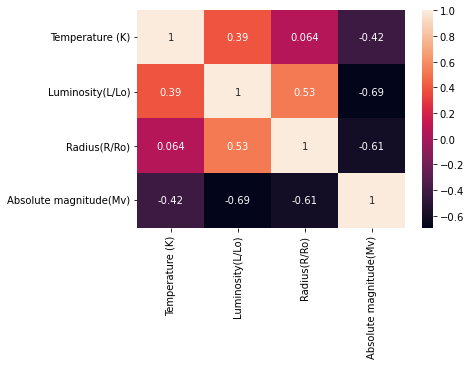

In [4]:
sns.heatmap(Dataset_StarType_Dropped.corr(), annot=True)

There are some very interesting things going on here! First the luminosity of a star is strongly correlated with its temperature The second hting is that the aboslute magnitude of a star is negative correlated with its temperature, luminosity and radius. The strongest correlation is between the radius of a star and its luminosity.

It'll also be interesting to see what would the scatterplot of diffferent parameters, compared to their star's spectral classe, look like.

/home/martin/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature (K)', ylabel='Spectral Class'>

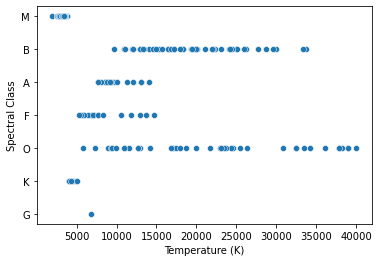

In [5]:
sns.scatterplot(Dataset_StarType_Dropped['Temperature (K)'], Dataset_StarType_Dropped['Spectral Class'])

/home/martin/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Luminosity(L/Lo)', ylabel='Spectral Class'>

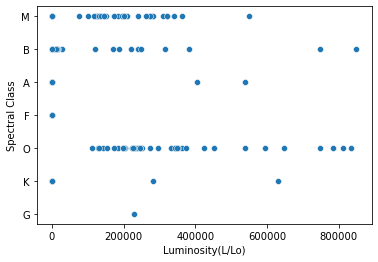

In [6]:
sns.scatterplot(Dataset_StarType_Dropped['Luminosity(L/Lo)'], Dataset_StarType_Dropped['Spectral Class'])

/home/martin/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Radius(R/Ro)', ylabel='Spectral Class'>

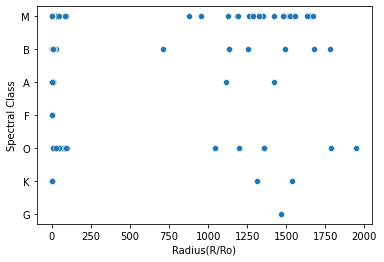

In [7]:
sns.scatterplot(Dataset_StarType_Dropped['Radius(R/Ro)'], Dataset_StarType_Dropped['Spectral Class'])

/home/martin/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Absolute magnitude(Mv)', ylabel='Spectral Class'>

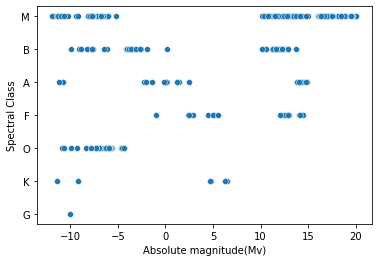

In [8]:
sns.scatterplot(Dataset_StarType_Dropped['Absolute magnitude(Mv)'], Dataset_StarType_Dropped['Spectral Class'])

Most of the spectral class B stars in the dataset are with a temperature range between 10000 to approximately 30000 kelvin. Stars of spectral class M seem to be the stars with the lowest luminosity, lowest tempreature, and biggest radius out of all the other spectral classes. In fact, it seems that stars of spectral class M are the most common stars in our dataset (perhaps in the universe too?)

All of those observations are actually in-line with the <a href='https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram'>Herzsprung-Russel diagram.</a>

Let's now see which stars are the most and least common in our dataset. We'll do that using a histogram.

Text(0.5, 1.0, 'Spectral classes amount')

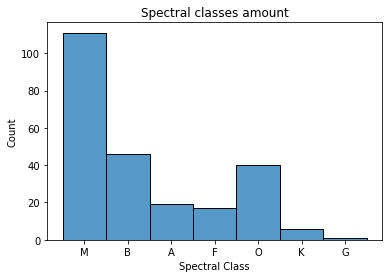

In [9]:
sns.histplot(Dataset_StarType_Dropped['Spectral Class'])
plt.title('Spectral classes amount')

Apparently, stars of type M, B, and O are the most common ones and A,F,K, and G are the least common ones.

Let's see if our strongest correlated values are in a linear relationship or not. Those are luminosity and radius and luminosity and temperature (refer to the heatmap higher in the notebook.)

/home/martin/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Luminosity(L/Lo)', ylabel='Temperature (K)'>

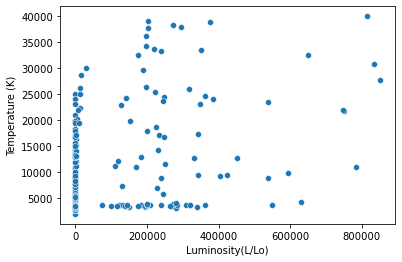

In [10]:
sns.scatterplot(Dataset_StarType_Dropped['Luminosity(L/Lo)'], Dataset_StarType_Dropped['Temperature (K)'])


/home/martin/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Luminosity(L/Lo)', ylabel='Radius(R/Ro)'>

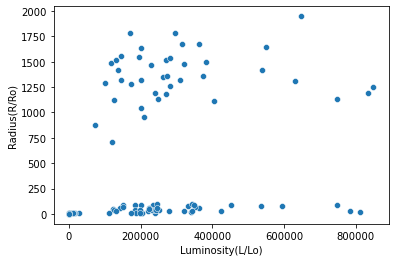

In [11]:
sns.scatterplot(Dataset_StarType_Dropped['Luminosity(L/Lo)'], Dataset_StarType_Dropped['Radius(R/Ro)'])

It seems like we won't be able to get away by using a regression model. We'll probably have to use clustering for classification.

<h1> K-Nearest Neighbour classification </h1>

We'll use the K-Nearest Neighbour classification, because we'll have a sample point that will represent our star. We'll classify it based on its proximity to one of the 5 star groups that we have in our dataset. The way KNN works is by connecting our point with its nearest neighbours and then we calculate the amount of connections that we have to each group - the one with the most connections wins. I should also mention that the shortest distance between our point and the rest of the points in our dataset is taken. The distance is usually euclidean, although one could also use minkowski or manhattan distance.

Let's first do a scatter plat of our star types compared to their spectral class.

In [1]:
sns.scatterplot(data=Dataset, x='Star type', y='Spectral Class', hue='Star type')

NameError: name 'sns' is not defined

Ok, obviously we have some oddly looking clusters. Apparently the dataset that we're using is flawless - very clean.

Let's get to work. We'll assign a k value. That will represent the amount of connections ( to  neighbouring points ) that our sample point will have. Let's use 3 for now.

In [26]:
k_value = 3

Here we create our model using scikit learn.

In [27]:
KNN = KNeighborsClassifier(k_value)

We'll also have to have data that we'll use as input to our model (X) and a feature that we want to predict (Y), so let's do that.

In [139]:
X = Dataset.drop(['Star type', 'Star color', 'Spectral Class'], axis=1)
Y = Dataset['Star type']

(240, 4)

Next, we'll split the data we've gathered into train and test sets. Our test split will be 20% of the data and the train split will be 80% of the data.

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1989)

Since the units of our numerical data are entirely different we'd want them to be standardized in a certain way, that is for them to have a standard deviation of 1 and a mean of 0 ( or the unit variance as the documentation says ).

In [28]:
Scaler = StandardScaler()

Another thing that we have to do before having fun with the model is to scale our train and test X values (look up why we scaled the data in the first place).

In [160]:
X_train_scaled = Scaler.fit_transform(X_train)

In [161]:
X_test_scaled = Scaler.transform(X_test.values.reshape(-1,4))b

/home/martin/.local/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [162]:
KNN.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [174]:
pred = KNN.predict([[9940,25.4,1.711,2.063]]) #Sirius A - A main sequence star

In [175]:
pred # 3 corresponds to a main sequence !

array([3])